# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?



In [ ]:
--------------Type the answers below this line-------------- 

1.) The prediction of in-hospital mortality for admitted patients remain poorly characterized. 
    We have tried to develop and validate a prediction model for all-cause in-hospital mortality among 
    admitted patients.

2.) To answer the above problem we need various factor values related to a patient when he/she is 
    hospitalized like age, previous medical conditions, etc.

3.) We can gather the required data from medical records of patients maintained by hospitals during 
    the hospitalization period of the patients.

4.) We start with ingesting the data using publicly available api in our system. Adding missing data 
    values, removing redundant values, finding trends in complex data sets that could be helpful for 
    the prediction, removing correlated attributes, find most insightful attributes and train classifiers 
    on transformed attributes are some analytics task we are performing.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
pd.options.display.max_rows = 100
pd.options.display.max_columns = 500

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves which should be a website which has the required data in it. You have to write Python crawler code to scrape data from the respective website rather than downloading ready-made dataset as such from sources like Kaggle etc. 

(Data downloaded from website like Kaggle will be awarded negative marks.)

## 2.1 Code for scraping data from website



In [ ]:
import requests, json 
response = requests.get('http://ids-api-101.herokuapp.com')
jsonData = json.loads(response.text)

print(jsonData["data"][0])

## 2.2 Code for converting the above scraped data into a dataframe

In [48]:
# Converting json into dataframe.
df = pd.DataFrame(jsonData["data"])

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [49]:
# Print first 5 rows 
df.head(5)

,age,aids,apache_2_bodysystem,apache_2_diagnosis,apache_3j_bodysystem,apache_3j_diagnosis,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,apache_post_operative,arf_apache,bmi,cirrhosis,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_potassium_max,d1_potassium_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,diabetes_mellitus,elective_surgery,encounter_id,ethnicity,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,gender,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,heart_rate_apache,height,hepatic_failure,hospital_death,hospital_id,icu_admit_source,icu_id,icu_stay_type,icu_type,immunosuppression,intubated_apache,leukemia,lymphoma,map_apache,patient_id,pre_icu_los_days,resprate_apache,solid_tumor_with_metastasis,temp_apache,ventilated_apache,weight
0,68.0,0.0,Cardiovascular,113.0,Sepsis,502.01,0.1,0.05,0.0,0.0,22.73,0.0,68.0,37.0,68.0,37.0,168.0,109.0,119.0,72.0,89.0,46.0,89.0,46.0,4.0,3.4,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,1.0,0.0,66154.0,Caucasian,3.0,6.0,0.0,4.0,M,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,118.0,180.3,0.0,0.0,118.0,Floor,92.0,admit,CTICU,0.0,0.0,0.0,0.0,40.0,25312.0,0.541667,36.0,0.0,39.3,0.0,73.9
1,77.0,0.0,Respiratory,108.0,Respiratory,203.01,0.47,0.29,0.0,0.0,27.42,0.0,95.0,31.0,95.0,31.0,145.0,128.0,118.0,72.0,120.0,38.0,120.0,38.0,4.2,3.8,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,1.0,0.0,114252.0,Caucasian,1.0,3.0,0.0,1.0,F,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,120.0,160.0,0.0,0.0,81.0,Floor,90.0,admit,Med-Surg ICU,0.0,0.0,0.0,0.0,46.0,59342.0,0.927778,33.0,0.0,35.1,1.0,70.2
2,25.0,0.0,Metabolic,122.0,Metabolic,703.03,0.0,0.0,0.0,0.0,31.95,0.0,88.0,48.0,88.0,48.0,,,96.0,68.0,102.0,68.0,102.0,68.0,,,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,0.0,0.0,119783.0,Caucasian,3.0,6.0,0.0,5.0,F,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,102.0,172.7,0.0,0.0,118.0,Accident & Emergency,93.0,admit,Med-Surg ICU,0.0,0.0,0.0,0.0,68.0,50777.0,0.000694,37.0,0.0,36.7,0.0,95.3
3,81.0,0.0,Cardiovascular,203.0,Cardiovascular,1206.03,0.04,0.03,1.0,0.0,22.64,0.0,48.0,42.0,48.0,42.0,185.0,88.0,116.0,92.0,84.0,84.0,84.0,84.0,5.0,3.5,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,0.0,1.0,79267.0,Caucasian,4.0,6.0,0.0,5.0,F,62.0,44.0,,,100.0,96.0,92.0,71.0,,,12.0,11.0,100.0,99.0,136.0,106.0,,,114.0,165.1,0.0,0.0,118.0,Operating Room / Recovery,92.0,admit,CTICU,0.0,1.0,0.0,0.0,60.0,46918.0,0.000694,4.0,0.0,34.8,1.0,61.7
4,19.0,0.0,Trauma,119.0,Trauma,601.01,,,0.0,0.0,,0.0,99.0,57.0,99.0,57.0,,,89.0,60.0,104.0,90.0,104.0,90.0,,,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,0.0,0.0,92056.0,Caucasian,,,,,M,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,,,100.0,100.0,130.0,120.0,130.0,120.0,60.0,188.0,0.0,0.0,33.0,Accident & Emergency,91.0,admit,Med-Surg ICU,0.0,0.0,0.0,0.0,103.0,34377.0,0.073611,16.0,0.0,36.7,0.0,


In [50]:
#Print last 5 rows
df.tail(5)

,age,aids,apache_2_bodysystem,apache_2_diagnosis,apache_3j_bodysystem,apache_3j_diagnosis,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,apache_post_operative,arf_apache,bmi,cirrhosis,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_potassium_max,d1_potassium_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,diabetes_mellitus,elective_surgery,encounter_id,ethnicity,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,gender,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,heart_rate_apache,height,hepatic_failure,hospital_death,hospital_id,icu_admit_source,icu_id,icu_stay_type,icu_type,immunosuppression,intubated_apache,leukemia,lymphoma,map_apache,patient_id,pre_icu_los_days,resprate_apache,solid_tumor_with_metastasis,temp_apache,ventilated_apache,weight
19996,,,,,,,,,0.0,,23.529412,,72.0,60.0,72.0,60.0,175.0,121.0,89.0,58.0,105.0,68.0,105.0,68.0,4.0,3.5,30.0,5.0,100.0,96.0,150.0,89.0,150.0,89.0,36.4,35.5,,0.0,1598.0,Caucasian,,,,,F,72.0,60.0,72.0,60.0,89.0,75.0,105.0,68.0,105.0,68.0,30.0,9.0,100.0,97.0,150.0,89.0,150.0,89.0,,170.0,,0.0,112.0,Accident & Emergency,384.0,admit,CSICU,,,,,,9938.0,-0.815278,,,,,68.0
19997,,0.0,Respiratory,102.0,Respiratory,206.01,,,0.0,0.0,,0.0,58.0,28.0,58.0,28.0,122.0,109.0,107.0,67.0,75.0,47.0,75.0,47.0,4.0,4.0,28.0,12.0,100.0,87.0,135.0,69.0,135.0,69.0,36.8,36.4,0.0,0.0,54592.0,Caucasian,4.0,6.0,0.0,5.0,F,45.0,31.0,45.0,31.0,89.0,72.0,55.0,47.0,55.0,47.0,26.0,15.0,100.0,87.0,119.0,96.0,119.0,96.0,111.0,,0.0,0.0,32.0,Accident & Emergency,369.0,admit,Med-Surg ICU,0.0,0.0,0.0,0.0,47.0,116528.0,0.072917,30.0,0.0,36.5,0.0,52.3
19998,81.0,0.0,Metabolic,307.0,Metabolic,701.02,0.14,0.04,0.0,0.0,30.147917,0.0,92.0,55.0,92.0,55.0,291.0,209.0,101.0,69.0,104.0,68.0,104.0,68.0,4.0,4.0,27.0,14.0,100.0,94.0,152.0,97.0,152.0,97.0,36.8,36.0,1.0,0.0,83711.0,Caucasian,3.0,6.0,0.0,4.0,F,64.0,58.0,64.0,58.0,90.0,71.0,77.0,77.0,77.0,77.0,22.0,16.0,100.0,96.0,134.0,133.0,134.0,133.0,108.0,163.0,0.0,0.0,119.0,Floor,417.0,admit,Med-Surg ICU,0.0,0.0,0.0,0.0,68.0,95194.0,2.217361,11.0,0.0,36.0,0.0,80.1
19999,30.0,0.0,Undefined Diagnoses,308.0,Musculoskeletal/Skin,1102.01,,,0.0,0.0,25.854639,0.0,86.0,65.0,86.0,65.0,95.0,89.0,126.0,74.0,95.0,77.0,95.0,77.0,,,26.0,12.0,99.0,94.0,135.0,108.0,135.0,108.0,37.0,36.5,0.0,0.0,96440.0,Caucasian,4.0,6.0,0.0,5.0,M,74.0,70.0,74.0,70.0,90.0,86.0,85.0,85.0,85.0,85.0,24.0,16.0,98.0,95.0,135.0,132.0,135.0,132.0,126.0,177.0,0.0,0.0,161.0,Accident & Emergency,408.0,admit,CSICU,0.0,0.0,0.0,0.0,43.0,78326.0,0.006250,7.0,0.0,36.5,0.0,81.0
20000,73.0,0.0,Cardiovascular,302.0,Cardiovascular,105.01,0.02,0.01,0.0,0.0,25.789349,0.0,58.0,48.0,58.0,48.0,116.0,116.0,88.0,61.0,70.0,60.0,70.0,60.0,3.9,3.9,25.0,16.0,100.0,92.0,111.0,106.0,111.0,106.0,37.2,36.0,0.0,0.0,18319.0,Other/Unknown,4.0,6.0,0.0,5.0,F,70.0,67.0,73.0,73.0,88.0,76.0,102.0,97.0,79.0,79.0,23.0,19.0,100.0,97.0,151.0,144.0,117.0,117.0,94.0,162.5,0.0,0.0,171.0,Accident & Emergency,404.0,admit,CSICU,0.0,0.0,0.0,0.0,71.0,111510.0,0.002083,13.0,0.0,36.0,0.0,68.1


In [51]:
#Basic cleaning of data 
# 1 . Replace blank with Nan
dataset = df.replace(r'^\s*$', np.nan, regex=True)

# 2.  Remove id columns (These columns doesn't have any significance)
dataset = dataset.drop(['encounter_id','patient_id'], axis = 1)

## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [52]:
dataset.describe()

,apache_post_operative,elective_surgery,hospital_death,hospital_id,icu_id,pre_icu_los_days
count,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000
mean,0.211939,0.196990,0.080546,111.756962,182.717764,0.811788
std,0.408692,0.397735,0.272143,39.977936,89.271047,2.407535
min,0.000000,0.000000,0.000000,4.000000,82.000000,-4.647917
25%,0.000000,0.000000,0.000000,83.000000,99.000000,0.007639
50%,0.000000,0.000000,0.000000,118.000000,143.000000,0.096528
75%,0.000000,0.000000,0.000000,138.000000,256.000000,0.370139
max,1.000000,1.000000,1.000000,198.000000,417.000000,62.647917


## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?


In [53]:
dataset.shape

(20001, 82)

### There are 200001 rows and 81 columns in dataset

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            18985 non-null  object 
 1   aids                           19847 non-null  object 
 2   apache_2_bodysystem            19587 non-null  object 
 3   apache_2_diagnosis             19587 non-null  object 
 4   apache_3j_bodysystem           19587 non-null  object 
 5   apache_3j_diagnosis            19768 non-null  object 
 6   apache_4a_hospital_death_prob  18629 non-null  object 
 7   apache_4a_icu_death_prob       18629 non-null  object 
 8   apache_post_operative          20001 non-null  float64
 9   arf_apache                     19847 non-null  object 
 10  bmi                            17906 non-null  object 
 11  cirrhosis                      19847 non-null  object 
 12  d1_diasbp_max                  19972 non-null 

### There are 81 columns in the dataset (80 independent variables and 1 dependent variable)

In [55]:
dataset.isnull().sum()

age                              1016
aids                              154
apache_2_bodysystem               414
apache_2_diagnosis                414
apache_3j_bodysystem              414
apache_3j_diagnosis               233
apache_4a_hospital_death_prob    1372
apache_4a_icu_death_prob         1372
apache_post_operative               0
arf_apache                        154
bmi                              2095
cirrhosis                         154
d1_diasbp_max                      29
d1_diasbp_min                      29
d1_diasbp_noninvasive_max         236
d1_diasbp_noninvasive_min         236
d1_glucose_max                   1656
d1_glucose_min                   1656
d1_heartrate_max                   21
d1_heartrate_min                   21
d1_mbp_max                         65
d1_mbp_min                         65
d1_mbp_noninvasive_max            552
d1_mbp_noninvasive_min            552
d1_potassium_max                 3039
d1_potassium_min                 3039
d1_resprate_

### Null values are present in the dataset, These null values needs to be cleaned up in missing data section

# 3. Data Preparation

## 3.1 Display how many unique values are present in each attribute


In [56]:
dataset.nunique()

age                                 74
aids                                 2
apache_2_bodysystem                 10
apache_2_diagnosis                  44
apache_3j_bodysystem                11
apache_3j_diagnosis                352
apache_4a_hospital_death_prob      100
apache_4a_icu_death_prob            99
apache_post_operative                2
arf_apache                           2
bmi                              10866
cirrhosis                            2
d1_diasbp_max                      120
d1_diasbp_min                       78
d1_diasbp_noninvasive_max          120
d1_diasbp_noninvasive_min           78
d1_glucose_max                     496
d1_glucose_min                     252
d1_heartrate_max                   120
d1_heartrate_min                   145
d1_mbp_max                         125
d1_mbp_min                          91
d1_mbp_noninvasive_max             122
d1_mbp_noninvasive_min              91
d1_potassium_max                    59
d1_potassium_min         

## 3.2 Check for the presence of duplicate data, identify the attributes with duplicate data, report the attributes. Mention the method adopted to remove duplicate data if present. Report the results again.

In [57]:
duplicate=dataset.duplicated()
duplicate.value_counts()

False    20001
dtype: int64

### There are no duplicate rows in the dataset. All rows are unique

## 3.3 Show whether there are any missing values in each attribute. Report the same.


In [58]:
dataset.isnull().sum()

age                              1016
aids                              154
apache_2_bodysystem               414
apache_2_diagnosis                414
apache_3j_bodysystem              414
apache_3j_diagnosis               233
apache_4a_hospital_death_prob    1372
apache_4a_icu_death_prob         1372
apache_post_operative               0
arf_apache                        154
bmi                              2095
cirrhosis                         154
d1_diasbp_max                      29
d1_diasbp_min                      29
d1_diasbp_noninvasive_max         236
d1_diasbp_noninvasive_min         236
d1_glucose_max                   1656
d1_glucose_min                   1656
d1_heartrate_max                   21
d1_heartrate_min                   21
d1_mbp_max                         65
d1_mbp_min                         65
d1_mbp_noninvasive_max            552
d1_mbp_noninvasive_min            552
d1_potassium_max                 3039
d1_potassium_min                 3039
d1_resprate_

### Missing values are present in dataset

## 3.4 Clean the missing data using any imputation technique, mention the method used and again report the change after cleaning the data.

In [59]:
# Remove rows where we have more than 80 percent of the columnsa are missing
limitPer = len(df.columns) * .80
dataset = dataset.dropna(thresh=limitPer, axis=0)
len(dataset)

19325

### 766 rows are removed as containg more than 80 percent of columns as missing

In [60]:
# Inpterpolate categorcal columns, Columns having < 10 distinct values and id with a new category
dataset.fillna(dataset.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [61]:
dataset.isnull().sum()

age                              0
aids                             0
apache_2_bodysystem              0
apache_2_diagnosis               0
apache_3j_bodysystem             0
apache_3j_diagnosis              0
apache_4a_hospital_death_prob    0
apache_4a_icu_death_prob         0
apache_post_operative            0
arf_apache                       0
bmi                              0
cirrhosis                        0
d1_diasbp_max                    0
d1_diasbp_min                    0
d1_diasbp_noninvasive_max        0
d1_diasbp_noninvasive_min        0
d1_glucose_max                   0
d1_glucose_min                   0
d1_heartrate_max                 0
d1_heartrate_min                 0
d1_mbp_max                       0
d1_mbp_min                       0
d1_mbp_noninvasive_max           0
d1_mbp_noninvasive_min           0
d1_potassium_max                 0
d1_potassium_min                 0
d1_resprate_max                  0
d1_resprate_min                  0
d1_spo2_max         

### all the categorical columns are imputed with mode

In [62]:
#Interpolate numerical columns with median
dataset.fillna(dataset.select_dtypes(include='float64').median().iloc[0], inplace=True)

In [63]:
dataset.isnull().sum()

age                              0
aids                             0
apache_2_bodysystem              0
apache_2_diagnosis               0
apache_3j_bodysystem             0
apache_3j_diagnosis              0
apache_4a_hospital_death_prob    0
apache_4a_icu_death_prob         0
apache_post_operative            0
arf_apache                       0
bmi                              0
cirrhosis                        0
d1_diasbp_max                    0
d1_diasbp_min                    0
d1_diasbp_noninvasive_max        0
d1_diasbp_noninvasive_min        0
d1_glucose_max                   0
d1_glucose_min                   0
d1_heartrate_max                 0
d1_heartrate_min                 0
d1_mbp_max                       0
d1_mbp_min                       0
d1_mbp_noninvasive_max           0
d1_mbp_noninvasive_min           0
d1_potassium_max                 0
d1_potassium_min                 0
d1_resprate_max                  0
d1_resprate_min                  0
d1_spo2_max         

### All the numerical columns are imputed with median

## 3.5 Check if all the attributes are following the same format and are consistent. If not, report all such attributes and what inconsistencies are present.

In [64]:
dataset_tmp = dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19325 entries, 0 to 20000
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            19325 non-null  float64
 1   aids                           19325 non-null  float64
 2   apache_2_bodysystem            19325 non-null  object 
 3   apache_2_diagnosis             19325 non-null  float64
 4   apache_3j_bodysystem           19325 non-null  object 
 5   apache_3j_diagnosis            19325 non-null  float64
 6   apache_4a_hospital_death_prob  19325 non-null  float64
 7   apache_4a_icu_death_prob       19325 non-null  float64
 8   apache_post_operative          19325 non-null  float64
 9   arf_apache                     19325 non-null  float64
 10  bmi                            19325 non-null  float64
 11  cirrhosis                      19325 non-null  float64
 12  d1_diasbp_max                  19325 non-null 

### All the attributes are following the same format and are consistent

## 3.6 Correct the data if there are inconsistencies from 3.5. Report or print the data after correction.

In [65]:
##---------Type the code below this line------------------##

### No inconsistencies found. So no need to correct the data

## 3.7 Identify the target variables.


## hospital_death is the target variable

## 3.8 Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)


## This should be done after step 3.9

## 3.9 Discretize the target variable or perform one-hot encoding on the target or any other as and if required.


In [66]:
# One hot encoding for categorical features
cat_cols = dataset_tmp.columns[dataset_tmp.dtypes == 'object']

# Label encoding of data
from sklearn.preprocessing import LabelEncoder
label_Encoder = LabelEncoder()

# apply le on categorical feature columns
dataset_tmp[cat_cols] = dataset_tmp[cat_cols].apply(lambda col: label_Encoder.fit_transform(col))    

dataset_tmp.head(5)

,age,aids,apache_2_bodysystem,apache_2_diagnosis,apache_3j_bodysystem,apache_3j_diagnosis,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,apache_post_operative,arf_apache,bmi,cirrhosis,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_potassium_max,d1_potassium_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,diabetes_mellitus,elective_surgery,ethnicity,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,gender,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,heart_rate_apache,height,hepatic_failure,hospital_death,hospital_id,icu_admit_source,icu_id,icu_stay_type,icu_type,immunosuppression,intubated_apache,leukemia,lymphoma,map_apache,pre_icu_los_days,resprate_apache,solid_tumor_with_metastasis,temp_apache,ventilated_apache,weight
0,68.0,0.0,0,113.0,9,502.01,0.10,0.05,0.0,0.0,22.730000,0.0,68.0,37.0,68.0,37.0,168.0,109.0,119.0,72.0,89.0,46.0,89.0,46.0,4.0,3.4,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,1.0,0.0,2,3.0,6.0,0.0,4.0,1,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,118.0,180.3,0.0,0.0,118.0,1,92.0,0,2,0.0,0.0,0.0,0.0,40.0,0.541667,36.0,0.0,39.3,0.0,73.9
1,77.0,0.0,6,108.0,8,203.01,0.47,0.29,0.0,0.0,27.420000,0.0,95.0,31.0,95.0,31.0,145.0,128.0,118.0,72.0,120.0,38.0,120.0,38.0,4.2,3.8,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,1.0,0.0,2,1.0,3.0,0.0,1.0,0,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,120.0,160.0,0.0,0.0,81.0,1,90.0,0,5,0.0,0.0,0.0,0.0,46.0,0.927778,33.0,0.0,35.1,1.0,70.2
2,25.0,0.0,3,122.0,5,703.03,0.00,0.00,0.0,0.0,31.950000,0.0,88.0,48.0,88.0,48.0,112.0,96.0,96.0,68.0,102.0,68.0,102.0,68.0,4.1,3.9,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,0.0,0.0,2,3.0,6.0,0.0,5.0,0,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,102.0,172.7,0.0,0.0,118.0,0,93.0,0,5,0.0,0.0,0.0,0.0,68.0,0.000694,37.0,0.0,36.7,0.0,95.3
3,81.0,0.0,0,203.0,0,1206.03,0.04,0.03,1.0,0.0,22.640000,0.0,48.0,42.0,48.0,42.0,185.0,88.0,116.0,92.0,84.0,84.0,84.0,84.0,5.0,3.5,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,0.0,1.0,2,4.0,6.0,0.0,5.0,0,62.0,44.0,70.0,60.0,100.0,96.0,92.0,71.0,86.0,80.0,12.0,11.0,100.0,99.0,136.0,106.0,140.0,110.0,114.0,165.1,0.0,0.0,118.0,2,92.0,0,2,0.0,1.0,0.0,0.0,60.0,0.000694,4.0,0.0,34.8,1.0,61.7
4,19.0,0.0,7,119.0,10,601.01,0.01,0.01,0.0,0.0,14.844926,0.0,99.0,57.0,99.0,57.0,112.0,96.0,89.0,60.0,104.0,90.0,104.0,90.0,4.1,3.9,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,0.0,0.0,2,4.0,6.0,0.0,5.0,1,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,20.0,16.0,100.0,100.0,130.0,120.0,130.0,120.0,60.0,188.0,0.0,0.0,33.0,0,91.0,0,5,0.0,0.0,0.0,0.0,103.0,0.073611,16.0,0.0,36.7,0.0,63.5


In [67]:
from sklearn import preprocessing
minMax_scaler = preprocessing.MinMaxScaler()
datset_scaled = minMax_scaler.fit_transform(dataset_tmp)
dataset_final = pd.DataFrame(datset_scaled, columns =dataset_tmp.columns)
dataset_final.head(5)

,age,aids,apache_2_bodysystem,apache_2_diagnosis,apache_3j_bodysystem,apache_3j_diagnosis,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,apache_post_operative,arf_apache,bmi,cirrhosis,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_potassium_max,d1_potassium_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,diabetes_mellitus,elective_surgery,ethnicity,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,gender,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,heart_rate_apache,height,hepatic_failure,hospital_death,hospital_id,icu_admit_source,icu_id,icu_stay_type,icu_type,immunosuppression,intubated_apache,leukemia,lymphoma,map_apache,pre_icu_los_days,resprate_apache,solid_tumor_with_metastasis,temp_apache,ventilated_apache,weight
0,0.712329,0.0,0.000000,0.057971,0.9,0.228063,0.555556,0.532995,0.0,0.0,0.148859,0.0,0.184874,0.311688,0.184874,0.311688,0.176580,0.298039,0.512605,0.450,0.233871,0.266667,0.239669,0.266667,0.285714,0.294118,0.256410,0.144928,1.00000,0.74,0.288732,0.268908,0.288732,0.268723,1.000000,0.898494,1.0,0.0,0.4,0.666667,1.0,0.0,0.75,1.0,0.292453,0.450549,0.289720,0.445652,0.618644,0.666667,0.318966,0.500000,0.324561,0.500000,0.326531,0.18,1.000000,0.74,0.378378,0.439716,0.378378,0.436620,0.594595,0.738140,0.0,0.0,0.587629,0.25,0.029851,0.0,0.285714,0.0,0.0,0.0,0.0,0.00000,0.012183,0.571429,0.0,0.947368,0.0,0.239484
1,0.835616,0.0,0.666667,0.033816,0.8,0.092217,0.742424,0.654822,0.0,0.0,0.237400,0.0,0.411765,0.233766,0.411765,0.233766,0.133829,0.372549,0.504202,0.450,0.483871,0.177778,0.495868,0.177778,0.333333,0.411765,0.230769,0.173913,1.00000,0.70,0.485915,0.218487,0.485915,0.218290,0.250000,0.543224,1.0,0.0,0.4,0.000000,0.4,0.0,0.00,0.0,0.226415,0.285714,0.224299,0.282609,0.576271,0.592593,0.310345,0.235849,0.315789,0.235849,0.428571,0.28,0.938272,0.70,0.135135,0.127660,0.135135,0.126761,0.608108,0.390478,0.0,0.0,0.396907,0.25,0.023881,0.0,0.714286,0.0,0.0,0.0,0.0,0.03750,0.018324,0.517857,0.0,0.394737,1.0,0.214383
2,0.123288,0.0,0.333333,0.101449,0.5,0.319394,0.505051,0.507614,0.0,0.0,0.322920,0.0,0.352941,0.454545,0.352941,0.454545,0.072491,0.247059,0.319328,0.425,0.338710,0.511111,0.347107,0.511111,0.309524,0.441176,0.089744,0.115942,0.97619,0.91,0.408451,0.537815,0.408451,0.537699,0.395833,0.813906,0.0,0.0,0.4,0.666667,1.0,0.0,1.00,0.0,0.481132,0.395604,0.476636,0.391304,0.423729,0.388889,0.362069,0.481132,0.368421,0.481132,0.204082,0.16,0.975309,0.91,0.493243,0.503546,0.493243,0.500000,0.486486,0.607981,0.0,0.0,0.587629,0.00,0.032836,0.0,0.714286,0.0,0.0,0.0,0.0,0.17500,0.003579,0.589286,0.0,0.605263,0.0,0.384668
3,0.890411,0.0,0.000000,0.492754,0.0,0.547926,0.525253,0.522843,1.0,0.0,0.147160,0.0,0.016807,0.376623,0.016807,0.376623,0.208178,0.215686,0.487395,0.575,0.193548,0.688889,0.198347,0.688889,0.523810,0.323529,0.115385,0.101449,1.00000,0.95,0.478873,0.361345,0.478873,0.361183,0.604167,0.492472,0.0,1.0,0.4,1.000000,1.0,0.0,1.00,0.0,0.235849,0.241758,0.308411,0.413043,0.457627,0.555556,0.370690,0.367925,0.324561,0.452830,0.040816,0.11,1.000000,0.99,0.412162,0.375887,0.439189,0.401408,0.567568,0.477822,0.0,0.0,0.587629,0.50,0.029851,0.0,0.285714,0.0,1.0,0.0,0.0,0.12500,0.003579,0.000000,0.0,0.355263,1.0,0.156716
4,0.041096,0.0,0.777778,0.086957,1.0,0.273043,0.510101,0.512690,0.0,0.0,0.000000,0.0,0.445378,0.571429,0.445378,0.571429,0.072491,0.247059,0.260504,0.375,0.354839,0.755556,0.363636,0.755556,0.309524,0.441176,0.051282,0.231884,1.00000,

In [68]:
X=dataset_final.iloc[:,dataset_final.columns != 'hospital_death'].values
Y=dataset_final['hospital_death'].values.ravel()

# 4. Data Exploration using various plots

## 4.1 Scatter plot of each attribute with the target.

ventilated_apache -- hospital_death


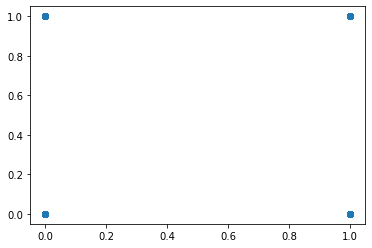

d1_spo2_min -- hospital_death


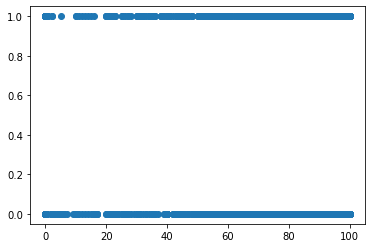

d1_sysbp_min -- hospital_death


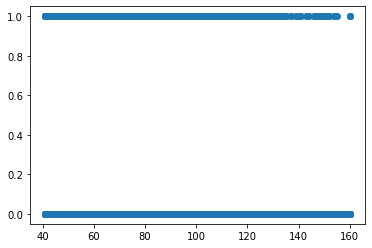

d1_mbp_min -- hospital_death


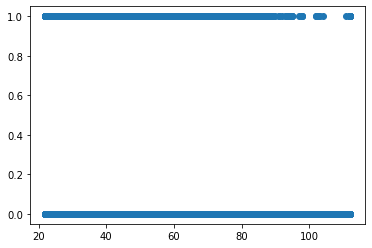

d1_sysbp_noninvasive_min -- hospital_death


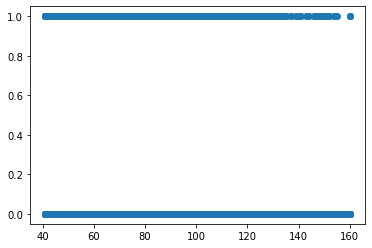

d1_mbp_noninvasive_min -- hospital_death


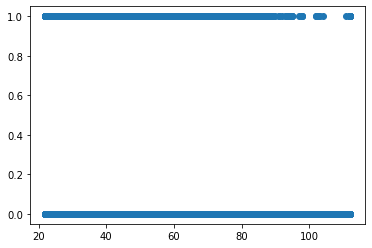

In [69]:
##---------Type the code below this line------------------##
attributeList = ['ventilated_apache','d1_spo2_min','d1_sysbp_min','d1_mbp_min','d1_sysbp_noninvasive_min','d1_mbp_noninvasive_min']
for attribute in attributeList:
    print(attribute + ' -- hospital_death')
    plt.scatter(dataset[attribute], Y)
    plt.show()


## 4.2 Pair plot of each attribute to identify the linear relationships among the attributes.


ventilated_apache -- d1_spo2_min


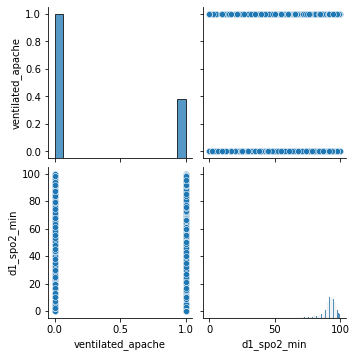

In [70]:
##---------Type the code below this line------------------##
import seaborn as sns
print('ventilated_apache -- d1_spo2_min')
sns.pairplot(dataset[['ventilated_apache', 'd1_spo2_min']])

d1_sysbp_min -- d1_mbp_min


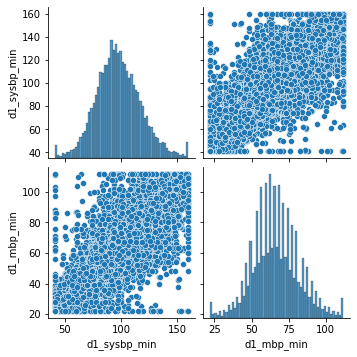

In [71]:
print('d1_sysbp_min -- d1_mbp_min')
sns.pairplot(dataset[['d1_sysbp_min', 'd1_mbp_min']])

d1_sysbp_noninvasive_min -- d1_mbp_noninvasive_min


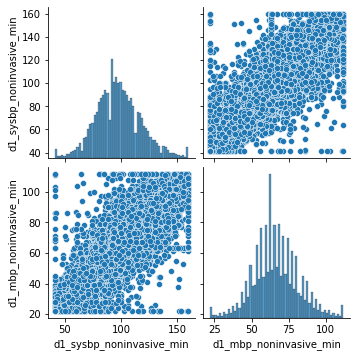

In [72]:
print('d1_sysbp_noninvasive_min -- d1_mbp_noninvasive_min')
sns.pairplot(dataset[['d1_sysbp_noninvasive_min', 'd1_mbp_noninvasive_min']])

## 4.3 Regression plots to identify the linear relationship between each attribute with the target variable. 


ventilated_apache -- hospital_death
d1_spo2_min -- hospital_death
d1_sysbp_min -- hospital_death
d1_mbp_min -- hospital_death
d1_sysbp_noninvasive_min -- hospital_death
d1_mbp_noninvasive_min -- hospital_death


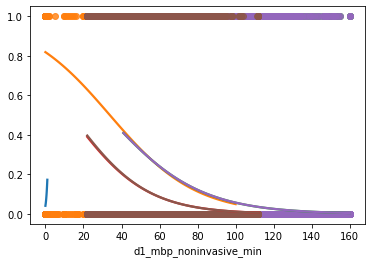

In [73]:
##---------Type the code below this line------------------##
#plot logistic regression curve
for attribute in attributeList:
    print(attribute + ' -- hospital_death')
    sns.regplot(x=attribute, y=Y, data=dataset, logistic=True, ci=None)

## 4.4 Can any other plot help to identify the optimal set of attributes that can be used for classification. The plot will be based on linear or nonlinear separations. If there is/are such plots, name them, explain why you think they can be helpful in the task and perform the plot as well.


##

ventilated_apache -- hospital_death
d1_spo2_min -- hospital_death
d1_sysbp_min -- hospital_death
d1_mbp_min -- hospital_death
d1_sysbp_noninvasive_min -- hospital_death
d1_mbp_noninvasive_min -- hospital_death


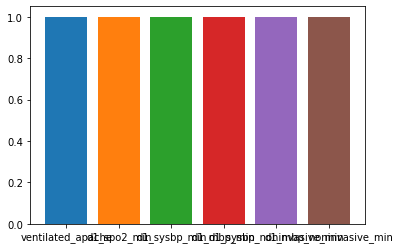

In [81]:
##---------Type the code below this line------------------##
for attribute in attributeList:
    print(attribute + ' -- hospital_death')
#     plt.figure(figsize=(10, 5))
    plt.bar(attribute,Y)

# 5. Data Wrangling



## 5.1 Display correlation heatmap of each attribute against the target and report which features are significant.

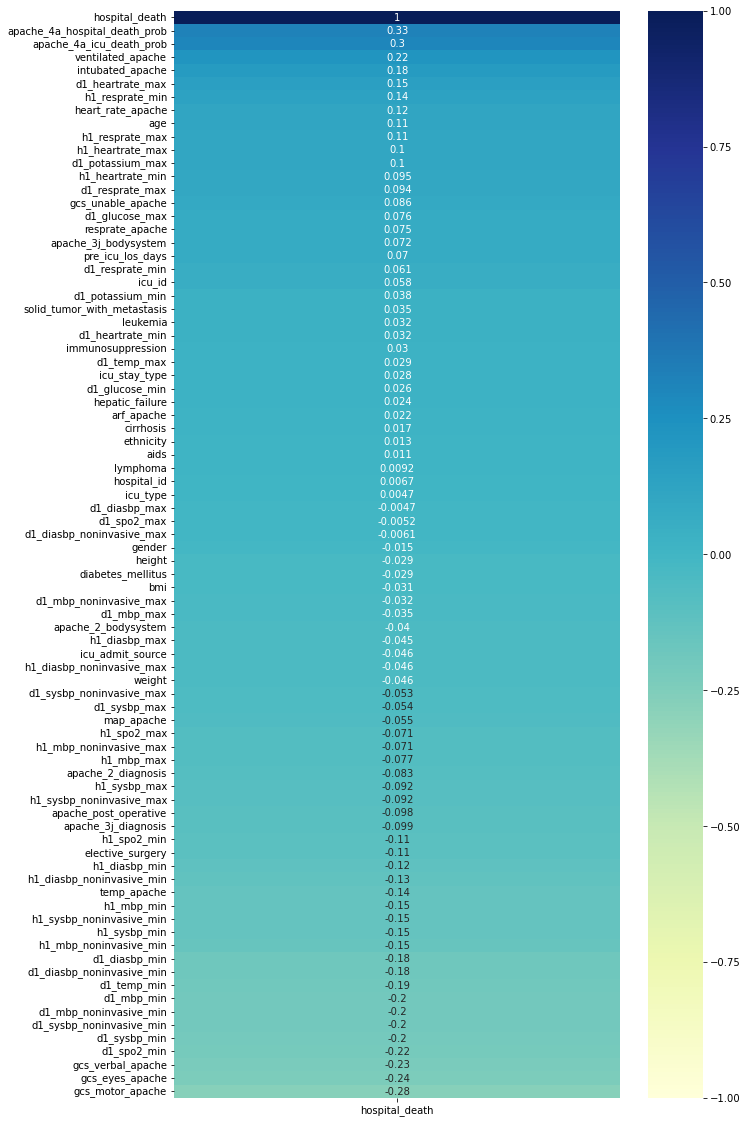

In [75]:
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(dataset_final.corr()[['hospital_death']].sort_values('hospital_death'),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

### apache_4a_hospital_death_prob, apache_4a_icu_death_prob, gcs_motor_apache, gcs_eyes_apache, gcs_verbal_apache are most significant features

## 5.2 Univariate Filters – Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>three</b>) 

Write your observations from the results of each method and report the top 5 significant features for each of the above methods. Also plot a graph of significant features for each of them for better visualization.

## Chi square test

<AxesSubplot:>

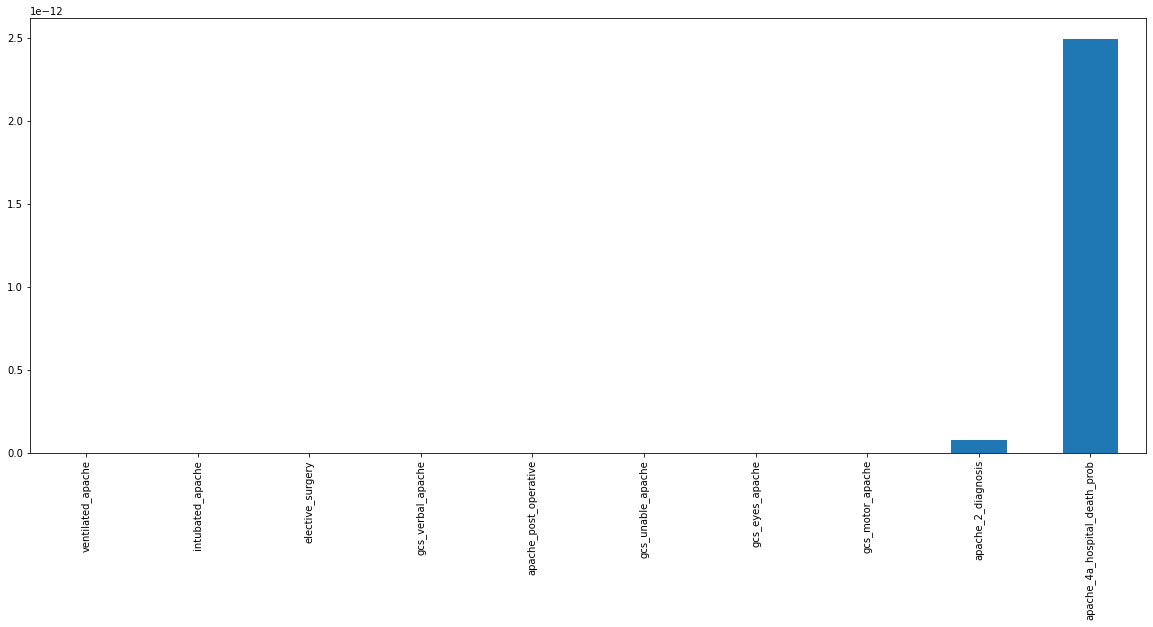

In [76]:
dataset_X = dataset_final.loc[:,dataset_final.columns != 'hospital_death']
from sklearn.feature_selection import chi2
chi_scores = chi2(dataset_X,Y)
p_values = pd.Series(chi_scores[1],index = dataset_X.columns)
p_values.sort_values(ascending = True , inplace = True)
p_values[:10].plot.bar(figsize=(20,8))

## Top 5 features are: ventilated_apache, intubated_apache, elective_surgery, gcs_verbal_apache, apache_post_operative

## Information Gain

<AxesSubplot:>

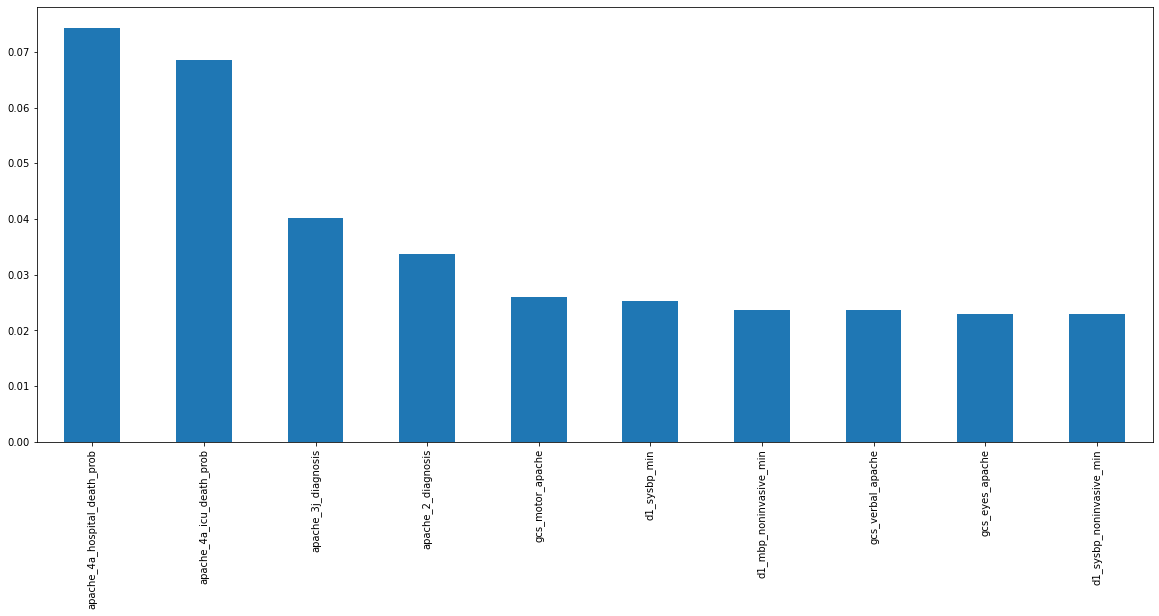

In [77]:
from sklearn.feature_selection import mutual_info_classif
ig_score = mutual_info_classif(X,Y)
gain_Score = pd.Series(ig_score, index = dataset_X.columns)
gain_Score.sort_values(ascending = False , inplace = True)
gain_Score[:10].plot(kind='bar',figsize=(20,8))

## Top 5 features are: apache_4a_hospital_death_prob, apache_4a_icu_death_prob, apache_3j_diagnosis, apache_2_diagnosis, gcs_motor_apache

## Fisher score

<AxesSubplot:>

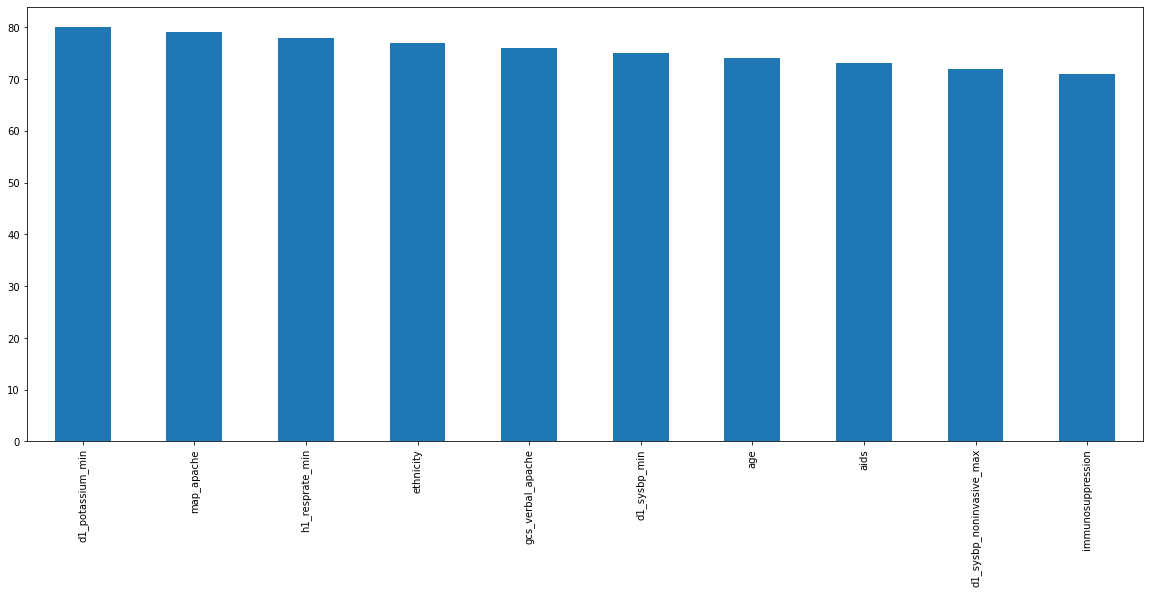

In [78]:
from skfeature.function.similarity_based import fisher_score
fshr_score = fisher_score.fisher_score(X,Y)
fsher_score = pd.Series(fshr_score, index = dataset_X.columns)
fsher_score.sort_values(ascending = False , inplace = True)
fsher_score[:10].plot(kind='bar',figsize=(20,8))

## Top 5 features are: d1_potassium_min, map_apache, h1_resprate_min, ethnicity, gcs_verbal_apache

## 5.3 Train a “DecisionTreeClassifier” on the entire data and use the classifier to extract the top 5 significant features. Plot graph of significant features for better visualization.

<AxesSubplot:>

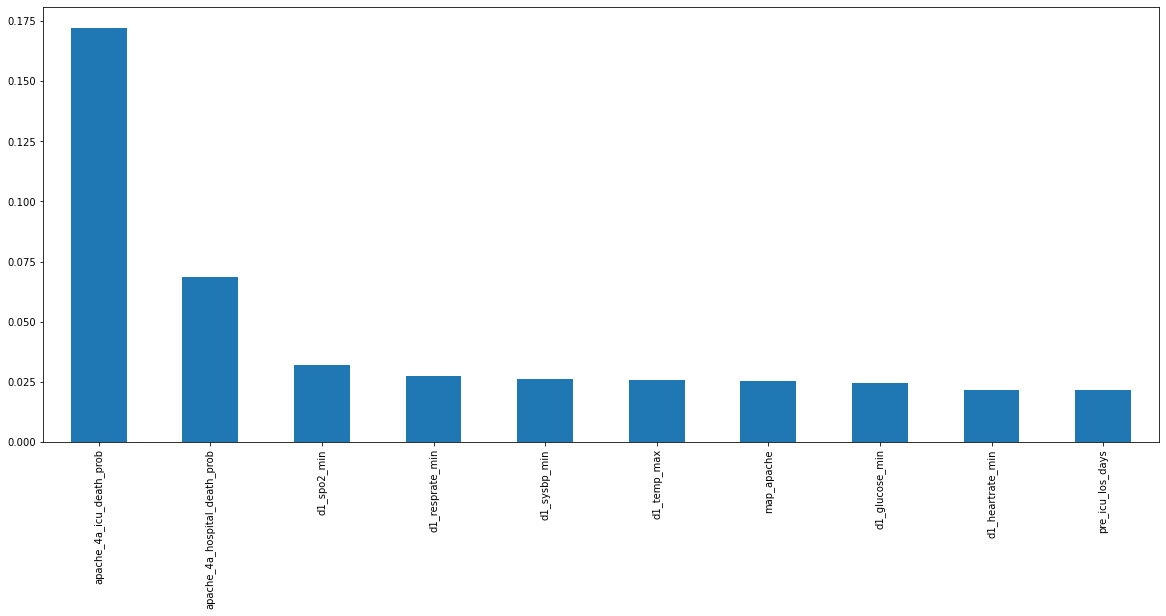

In [79]:
# Define decion tree model and fit on X and y
cartClassfier = DecisionTreeClassifier()
cartClassfier.fit(X, Y)

# Extract most important features
feature_imp = cartClassfier.feature_importances_

fture_imp = pd.Series(feature_imp, index = dataset_X.columns)
fture_imp.sort_values(ascending = False , inplace = True)
fture_imp[:10].plot(kind='bar',figsize=(20,8))

## Top 5 features are: apache_4a_icu_death_prob, apache_4a_hospital_death_prob, d1_spo2_min, d1_resprate_min, d1_sysbp_min

## 5.4 Using "mlxtend" library perform SequentialFeatureSelector to identify top 5 features.

In [80]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(cartClassfier,k_features=5,forward=True,floating=False,verbose=2,scoring='accuracy',cv=0)
sfs1 = sfs1.fit(X, Y, custom_feature_names=dataset_X.columns)
sfs1.subsets_


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    1.3s finished

[2022-02-26 21:42:27] Features: 1/5 -- score: 0.9524450194049159[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.2s finished

[2022-02-26 21:42:31] Features: 2/5 -- score: 0.9935316946959897[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    5.2s finished

[2022-02-26 21:42:36] Features: 3/5 -- score: 0.9989650711513584[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

{1: {'feature_idx': (10,),
  'cv_scores': array([0.95244502]),
  'avg_score': 0.9524450194049159,
  'feature_names': ('bmi',)},
 2: {'feature_idx': (10, 75),
  'cv_scores': array([0.99353169]),
  'avg_score': 0.9935316946959897,
  'feature_names': ('bmi', 'pre_icu_los_days')},
 3: {'feature_idx': (10, 16, 75),
  'cv_scores': array([0.99896507]),
  'avg_score': 0.9989650711513584,
  'feature_names': ('bmi', 'd1_glucose_max', 'pre_icu_los_days')},
 4: {'feature_idx': (10, 12, 16, 75),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('bmi',
   'd1_diasbp_max',
   'd1_glucose_max',
   'pre_icu_los_days')},
 5: {'feature_idx': (0, 10, 12, 16, 75),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('age',
   'bmi',
   'd1_diasbp_max',
   'd1_glucose_max',
   'pre_icu_los_days')}}

## Top 5 features are: age, bmi, d1_diasbp_max, d1_glucose_max, pre_icu_los_days

## 5.5 Conclude the top 3 significant features with necessary justifications.

--------------Type the answers below this line--------------

## apache_4a_icu_death_prob, apache_4a_hospital_death_prob, gcs_verbal_apache are the top 3 significant features

## 1. apache_4a_icu_death_prob is highly correlated to target value as per the correlationn heatmap and also identified as top feature by Information Gain & Decision Tree classifier.

## 2. apache_4a_hospital_death_prob is highly correlated to target value as per the correlationn heatmap and also identified as top feature by Information Gain & Decision Tree classifier.

## 3. gcs_verbal_apache is highly correlated to target value as per the correlationn heatmap and also identified as top feature by Chi Square Test & Fischer Test.